# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

In [76]:
print("I Wayan Rangga Rijasa - 0706022210019")

I Wayan Rangga Rijasa - 0706022210019


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [41]:
#1

url = 'https://raw.githubusercontent.com/RanggaRijasa/DataMining2024/refs/heads/main/penguins_size.csv'
df = pd.read_csv(url)
df.head(10)

## csv url is stored on a variable, then the variable is read/stored by a dataframe, lastly displayed first 
## 10 rows in the dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [42]:
#2
df.info()

## provide a summary of the dataframe, includes rows, collumns, data types and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [43]:
#3
df.describe()

## gives descriptive statistics of the numerical columns in the DataFrame, such as the mean, standard deviation, min, max, and quartile values.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [44]:
#4

species_counts = df['species'].value_counts(dropna=False)
island_counts = df['island'].value_counts(dropna=False)
sex_counts = df['sex'].value_counts(dropna=False)

## Counts the occurrences of unique values in the specified columns (species, island, sex).
## dropna false ensures that null values are also counted


print("Species:\n", species_counts)
print("\nIsland:\n", island_counts)
print("\nSex:\n", sex_counts)

Species:
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Island:
 island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Sex:
 sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [45]:
#5
df['sex'] = df['sex'].replace('.', df['sex'].mode()[0])
df.dropna(inplace=True)
df.isnull().sum()

## Change data into another form using replace, dropna drops null values, isnull.sum ceks and sum all the missing values 

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Create your own insightful visualization and explain it in at least 2 sentences

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_14728\2097285283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=df, palette='coolwarm')


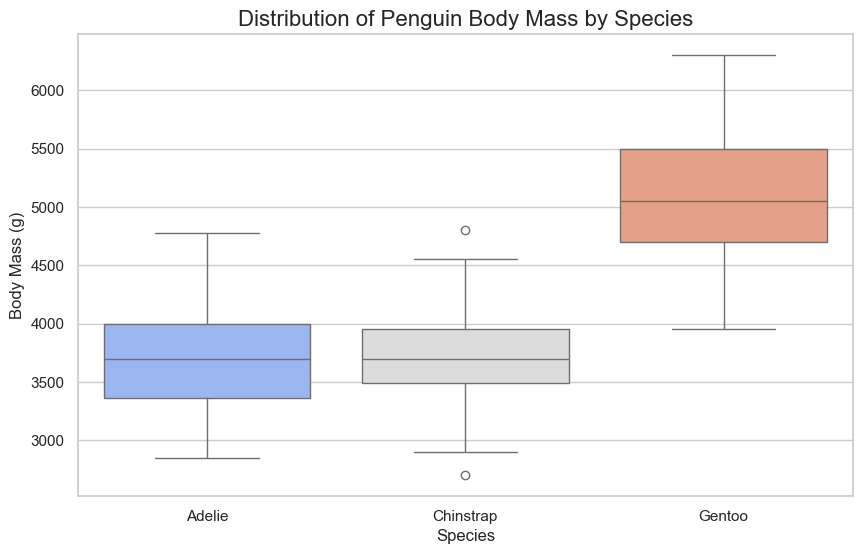


The boxplot visualizes the distribution of penguin body mass across different species, showing the range, median, and any outliers for each species. This helps in comparing the typical body mass for each species and identifying which species tend to be heavier or lighter based on the distribution patterns.


In [46]:
#6
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual styling
sns.set(style="whitegrid")

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of body_mass_g across species
sns.boxplot(x='species', y='body_mass_g', data=df, palette='coolwarm')

# Set titles and labels
plt.title("Distribution of Penguin Body Mass by Species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)

# Show the plot
plt.show()

print()
print("The boxplot visualizes the distribution of penguin body mass across different species, showing the range, median, and any outliers for each species. This helps in comparing the typical body mass for each species and identifying which species tend to be heavier or lighter based on the distribution patterns.")

7. Check unique value of our target variable

In [47]:
#7

unique_species = df['species'].unique()

print("Unique species:\n", unique_species)

## retrieves all unique species and displays them

Unique species:
 ['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [48]:
#8
encoder = LabelEncoder()

df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])


df.head()

## transform categorical value into numeric values using label encoder, the updated dataframe is then printed to show the first view rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


9. encode the target column and display the results

In [49]:
#9
encoder = LabelEncoder()#encode buat ganti string/object jadi bentuk angka

df['species'] = encoder.fit_transform(df['species'])
df.head()

## encodes species column from a string to a number, the updated dataframe is then printed to show the first view rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


10. create a heatmap to see the correlation and explain the conclusion

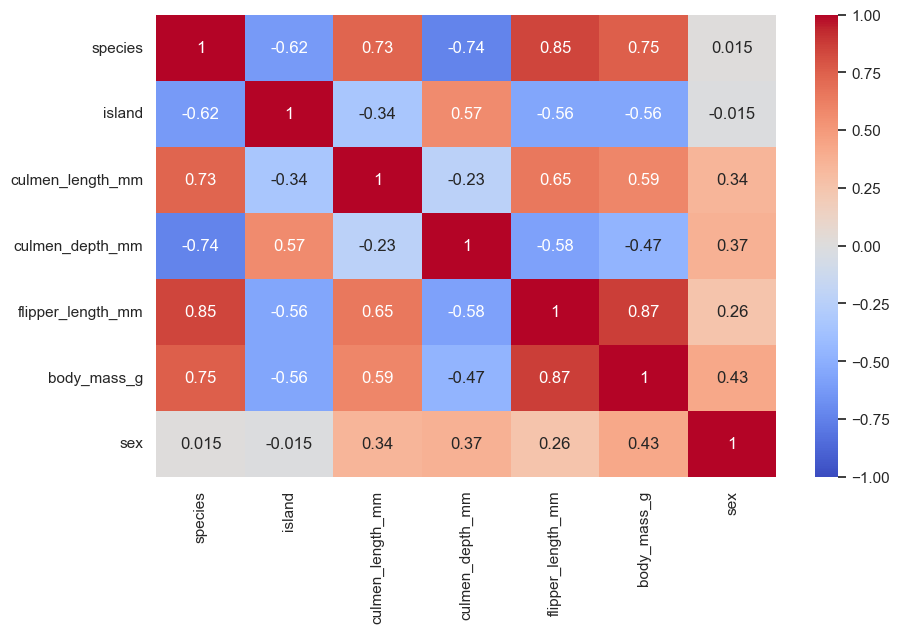

Species has a strong positive correlation with flipper_length_mm (0.85) and body_mass_g (0.75), meaning penguin species tend to differ based on flipper size and body mass.
Culmen_depth_mm and flipper_length_mm have a negative correlation (-0.58), indicating that penguins with greater bill depth tend to have shorter flippers.


In [72]:
#10

import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

## Create a heatmap to show correlations

plt.show()
print("Species has a strong positive correlation with flipper_length_mm (0.85) and body_mass_g (0.75), meaning penguin species tend to differ based on flipper size and body mass.")
print("Culmen_depth_mm and flipper_length_mm have a negative correlation (-0.58), indicating that penguins with greater bill depth tend to have shorter flippers.")


## Machine Learning

1. Splitting X and y

In [51]:
#1
x = df[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']

## split the columns into feature matrix (x) and target vector (y)

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [52]:
#2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## splits the dataset into training and test sets.

In [53]:
#3
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

## prints the shape (number of rows and columns) of the training and test feature datasets

X_train shape: (267, 6)
X_test shape: (67, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [73]:
#Criterion Entropy
#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)

## creates a decision tree classifier (clf_en) where the splitting criterion is entropy.
## Limits the depth of the tree to 3 and random_state=0 Ensures reproducibility for the tree’s structure.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [74]:
#b
y_pred_en = clf_en.predict(x_test)

## use the trained model (clf_en) to make predictions on the test set (x_test), storing the predictions in y_pred_en.

In [56]:
#c
print("Model accuracy  score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test,y_pred_en)))

## ##  alculates the accuracy of the model, comparing the predicted values (y_pred_en) with the actual test set labels (y_test). The result is printed with four decimal places.

Model accuracy  score with criterion entropy: 0.9701


In [57]:
#d
print("Training set score: {0:0.4f}".format(clf_en.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_en.score(x_test,y_test)))

## computes model accuracy on test and training set, then printed both result

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\nentropy = 0.863\nsamples = 7\nva

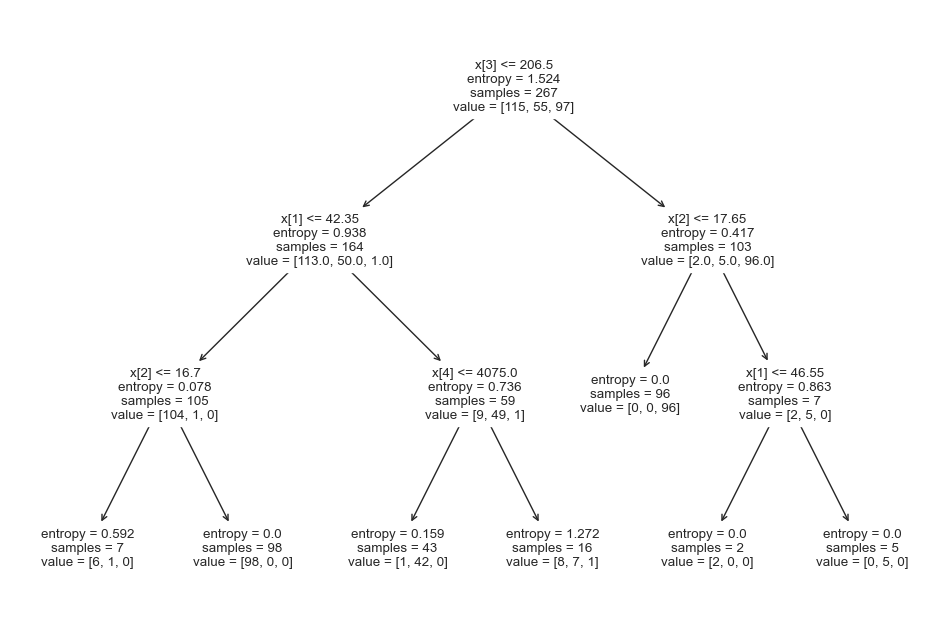

In [58]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train,y_train))

##  sets the size of the figure to 12 by 8 inches.
##   plots the structure of the decision tree that was trained using the training data

2. Criterion Gini index

In [59]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

## creates a decision tree classifier where the splitting criterion is the Gini Index.
## Limits the depth of the tree to 3 levels
## random_state=0 Ensures reproducibility so that the decision tree structure will remain the same across different runs.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [60]:
#b
y_pred_gini = clf_gini.predict(x_test)

## predict the species on the test dataset (x_test). The predicted values are stored in y_pred_gini.

In [61]:
#c
print("Model accuracy  score with criterion gini: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

##  calculates the accuracy of the Gini-based model by comparing the predicted values (y_pred_gini) with the actual labels (y_test). The accuracy score is printed with 4 decimal places.

Model accuracy  score with criterion gini: 0.9851


In [62]:
#d
print("Training set score: {0:0.4f}".format(clf_gini.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(x_test,y_test)))

## Calculates the model accuracy on the training and test dataset, the prints them

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(0.75,

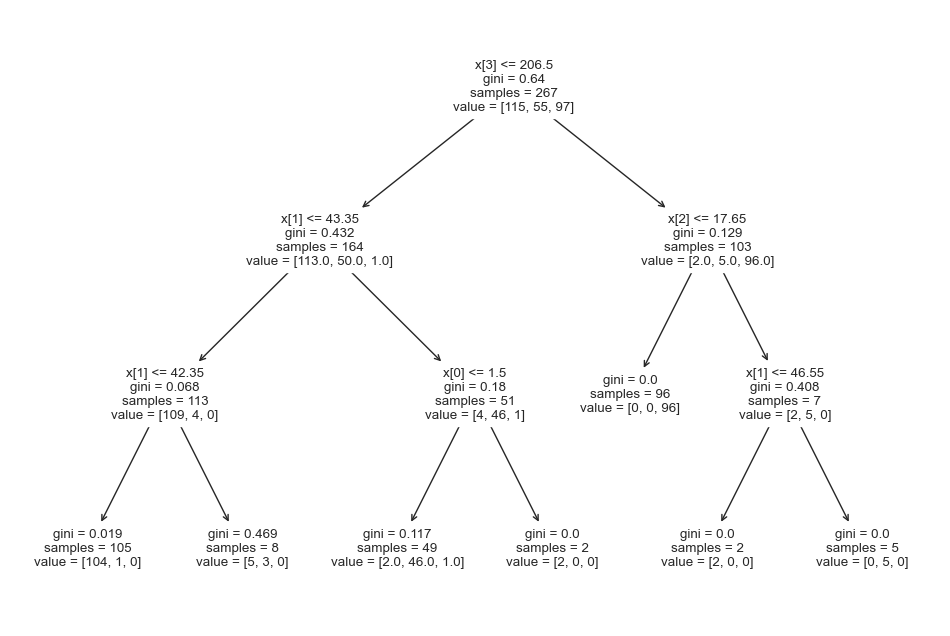

In [63]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

## Sets the size of the figure to 12 by 8 inches.
##  Plots the decision tree structure for the model trained using the Gini Index criterion.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [64]:
#f
print("Confusion Matrix Entropy")
cm = confusion_matrix(y_test, y_pred_en)
cm

## generates the confusion matrix for the entropy-based decision tree model (y_pred_en).

Confusion Matrix Entropy


array([[30,  1,  0],
       [ 1, 12,  0],
       [ 0,  0, 23]], dtype=int64)

In [65]:
#g
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

print("Classification Report gini")
print(classification_report(y_test, y_pred_gini))

## generates a detailed classification report for the entropy-based and gini-based models (y_pred_en).

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report gini
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [75]:
#h
print("Accuracy of entropy and gini is (0.97 vs 0.97), this makes gini more accurate")

Accuracy of entropy and gini is (0.97 vs 0.97), this makes gini more accurate


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [67]:
#a
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

## creates a Naive Bayes classifier using the Gaussian distribution.

GaussianNB()

In [68]:
#b
nb_y_pred = nb_classifier.predict(x_test)

## Train the Naive Bayes model, and use it to predict the species labels on the test dataset (x_test).

In [69]:
#c
print("Model accuracy  score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test,nb_y_pred)))

## calculates the accuracy of the Naive Bayes model by comparing the predicted values (nb_y_pred) with the actual values (y_test).

#d
cm = confusion_matrix(y_test, nb_y_pred)
cm

## creates the confusion matrix for the Naive Bayes model.

Model accuracy  score with Naive Bayes: 1.0000


array([[31,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 23]], dtype=int64)

In [70]:
#e
print("Classification Report")
print(classification_report(y_test, nb_y_pred))

## generates a detailed classification report that includes the following metrics for each class (species)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [77]:
#f
print("Naive Bayes provide better accuracy then both gini and entropy, with the accuracy of 1.00")

Naive Bayes provide better accuracy then both gini and entropy, with the accuracy of 1.00


Good Luck :)